### Importing library and reading of hdf file

In [1]:
from satpy import Scene
from glob import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.image as img
import seaborn as sns
import math
import earthpy.plot as ep

In [2]:
filenames=glob('MYD021KM.A2023015.0820.061.2023015201751.hdf')
hdf = Scene(reader='modis_l1b', filenames=filenames)
hdf.available_dataset_names()

['1',
 '10',
 '11',
 '12',
 '13hi',
 '13lo',
 '14hi',
 '14lo',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'latitude',
 'longitude',
 'satellite_azimuth_angle',
 'satellite_zenith_angle',
 'solar_azimuth_angle',
 'solar_zenith_angle']

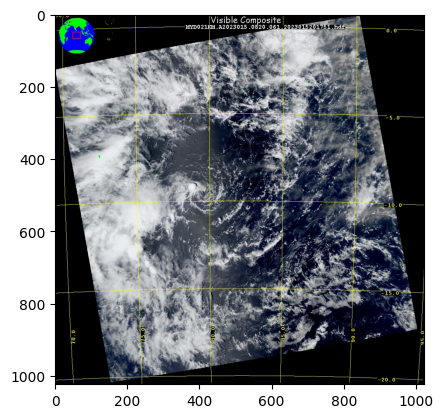

In [3]:
im = img.imread('MYBRGB.A2023015.0820.061.2023016032812.jpg')
plt.imshow(im);

#### DATE - 15 JAN 2023
#### TIME - 8:20 AM TO 8:25 AM
#### REGION- INDIAN OCEAN
#### LATITUDE 20S TO 0
#### LATITUDE 70E TO 95E

### Now Loading band '31'

* Band 31 is 11µm

In [4]:
hdf.load(['31'])
hdf['31'].attrs

{'file_type': 'hdf_eos_data_1000m',
 'name': '31',
 'resolution': 1000,
 'calibration': 'brightness_temperature',
 'coordinates': ('longitude', 'latitude'),
 'wavelength': WavelengthRange(min=10.78, central=11.03, max=11.28, unit='µm'),
 'modifiers': (),
 'units': 'K',
 'standard_name': 'toa_brightness_temperature',
 'platform_name': 'EOS-Aqua',
 'sensor': 'modis',
 'rows_per_scan': 10,
 'start_time': datetime.datetime(2023, 1, 15, 8, 20),
 'end_time': datetime.datetime(2023, 1, 15, 8, 25),
 'reader': 'modis_l1b',
 'area': <pyresample.geometry.SwathDefinition at 0x19ddb1095d0>,
 '_satpy_id': DataID(name='31', wavelength=WavelengthRange(min=10.78, central=11.03, max=11.28, unit='µm'), resolution=1000, calibration=<calibration.brightness_temperature>, modifiers=()),
 'ancillary_variables': []}

In [5]:
r_1=600
r_2=800
c_1=100
c_2=300

In [97]:
k1=hdf['31'].values
#k1=k1[r_1:r_2,c_1:c_2]
n,m=k1.shape
means1 = []
stds = []
for i in range(n):
    for j in range(m):
        if i == 0 and j == 0:
            slice = k1[:2,:2]
        elif i == 0 and j == m-1:
            slice = k1[:2,-2:]
        elif i == n-1 and j == 0:
            slice = k1[-2:,:2]
        elif i == n-1 and j == m-1:
            slice = k1[-2:,-2:]
        elif i == 0:
            slice = k1[:2,j-1:j+2]
        elif i == n-1:
            slice = k1[-2:,j-1:j+2]
        elif j == 0:
            slice = k1[i-1:i+2,:2]
        elif j == m-1:
            slice = k1[i-1:i+2,-2:]
        else:
            slice = k1[i-1:i+2,j-1:j+2]
        means1.append(np.mean(slice))
        stds.append(np.std(slice))

In [99]:
means2D = np.array(means1).reshape(2030,1354)
std2D = np.array(stds).reshape(2030,1354)

In [101]:
x_std = []

for i in range(std2D.shape[0]):
  for j in range(std2D.shape[1]):
    if std2D[i,j]>0.5 and means2D[i,j] <=290:
      x_std.append(k1[i,j])
    else:
      x_std.append(0)

In [102]:
x_std_2D = np.array(x_std).reshape(2030,1354)

In [6]:
k1=hdf['31'].values
#k1=k1[r_1:r_2,c_1:c_2]
T11=k1.flatten()
T11=np.array(T11).reshape(len(T11),1)
T11.shape

(2748620, 1)

In [7]:
hdf.load(['latitude'])
lat_w=hdf['latitude'].values
#lat=lat_w[r_1:r_2,c_1:c_2]
lat_w.min(), lat_w.max()

(-20.253208, 0.6962157)

In [8]:
hdf.load(['longitude'])
lon_w=hdf['longitude'].values
#lon=lon_w[r_1:r_2,c_1:c_2]
lon_w.min(), lon_w.max()

(69.50658, 94.663734)

C:\Users\Arushi.SUSHANT\AppData\Local\Temp\ipykernel_13052\3184692247.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(lon_w, lat_w, x_std_2D, cmap="jet")


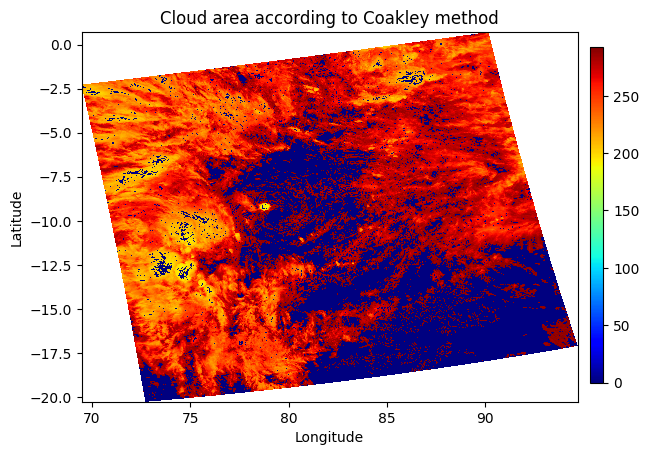

In [105]:
fig, ax = plt.subplots()

# Plot the variable using pcolormesh
pcm = ax.pcolormesh(lon_w, lat_w, x_std_2D, cmap="jet")


cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Add the color bar to the separate axes object
cbar = plt.colorbar(pcm, cax=cax)
# Set the title of the plot
ax.set_title("Cloud area according to Coakley method")

# Set the x and y labels of the plot
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [155]:
num_pixels = np.count_nonzero(np.array(x_std) == 0)


print(f'clear sky pixel according to Coakley method: {num_pixels}')

clear sky pixel according to Coakley method: 909348


In [297]:
909348/2748620

0.3308380205339407

In [9]:
hdf.load(['32'])
hdf['32'].attrs;

In [10]:
t_12=hdf['32'].values
#t_12=t_12[r_1:r_2,c_1:c_2]
T12=t_12.flatten()
T12=np.array(T12).reshape(len(T12),1)
T12.shape

(2748620, 1)

In [11]:
dTb=T11-T12
dTb.min()

-1.8862307644888858

In [12]:
hdf.load(['3'])
hdf['3'].attrs
alp=hdf['3'].values
#alp=alp[r_1:r_2,c_1:c_2]
alpha=alp.flatten()
alpha=np.array(alpha).reshape(len(alpha),1)
alpha.shape

(2748620, 1)

In [38]:
X=np.concatenate((T11,dTb,alpha), axis=1)
X.shape

(2748620, 3)

In [39]:
X

array([[ 2.86904414e+02,  8.83902496e-01,  2.34783783e+01],
       [ 2.86769458e+02,  1.06920769e+00,  2.41842442e+01],
       [ 2.86097365e+02,  8.55324066e-01,  2.51894569e+01],
       ...,
       [ 2.13014976e+02, -9.15987135e-02,  5.81656227e+01],
       [ 2.10868876e+02, -3.24549566e-01,  5.97621384e+01],
       [ 2.10202298e+02, -4.60450875e-01,  6.00725708e+01]])

## K-Means

C:\Users\Arushi.SUSHANT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


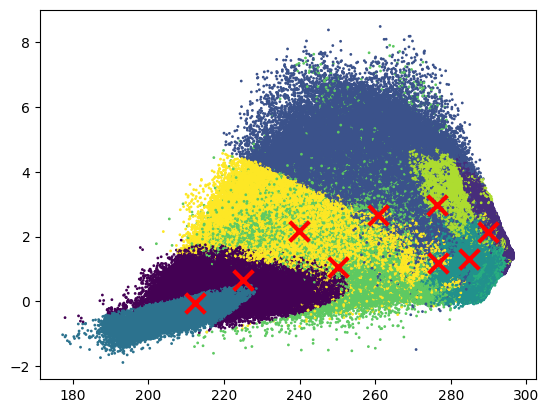

In [212]:
from sklearn.cluster import KMeans
import numpy as np
# Initialize KMeans with the number of clusters you want to create
kmeans = KMeans(n_clusters=9)

# Fit KMeans on the dataset
kmeans.fit(X)

# Get the cluster assignments for each data point
labelsk = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_





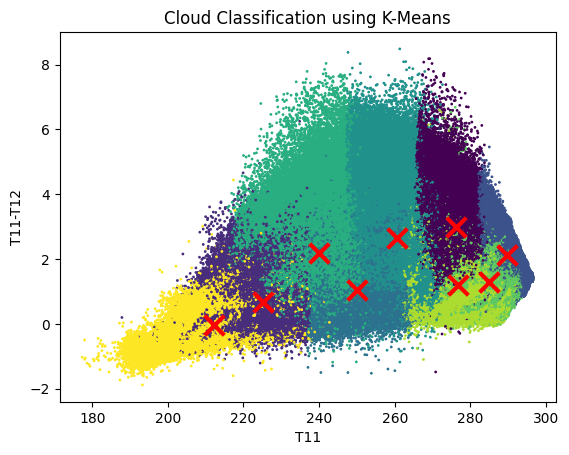

In [218]:
plt.scatter(X[:,0], X[:,1], c=labelsk,s=1)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='r')
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using K-Means")
plt.xlabel("T11")
plt.ylabel("T11-T12")
plt.show()
plt.show()

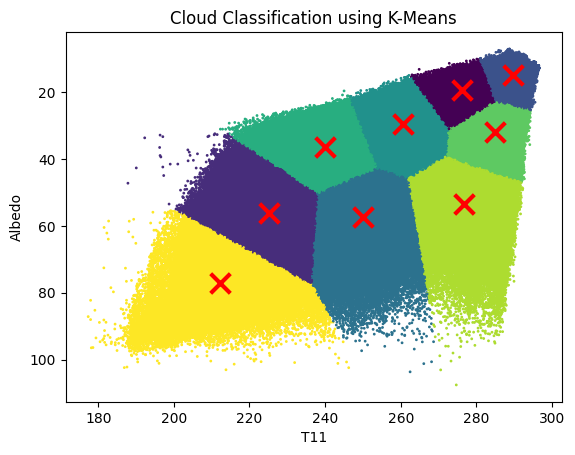

In [219]:
plt.scatter(X[:,0], X[:,2], c=labelsk,s=1)
plt.scatter(centroids[:,0], centroids[:,2], marker='x', s=200, linewidths=3, color='r')
plt.gca().invert_yaxis()
plt.title("Cloud Classification using K-Means")
plt.xlabel("T11")
plt.ylabel("Albedo")
plt.show()

In [276]:
sizes = np.bincount(labelsk)
s=0
sk=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    sk.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

Cluster 1: center=[255.22089436   2.77457993  29.59963215], size=421661
Cluster 2: center=[290.99840837   2.00686808  14.21763932], size=173047
Cluster 3: center=[282.83555034   1.21045205  40.8641567 ], size=1104211
Cluster 4: center=[283.32959272   2.64077574  17.58626724], size=146299
Cluster 5: center=[271.00627594   2.92931484  22.53871686], size=302100
Cluster 6: center=[ 2.11885228e+02 -4.05094633e-02  7.61407081e+01], size=177545
Cluster 7: center=[257.8894336    1.21638953  53.71748398], size=213113
Cluster 8: center=[236.62053223   1.6603036   41.29933964], size=122890
Cluster 9: center=[226.56280972   0.61098922  58.72532465], size=87754


2748620

In [298]:
sizes/2748620*100

array([ 8.46530259, 31.35191478,  7.48124513, 19.34789094, 11.56376654,
        3.09846396,  6.19085214,  6.07806827,  6.42249565])

In [228]:
clustered_array

array([[6, 6, 6, ..., 2, 2, 2],
       [6, 6, 6, ..., 2, 2, 2],
       [6, 6, 6, ..., 2, 2, 2],
       ...,
       [4, 5, 5, ..., 1, 8, 8],
       [4, 4, 4, ..., 1, 1, 8],
       [4, 4, 4, ..., 1, 1, 1]])

C:\Users\Arushi.SUSHANT\AppData\Local\Temp\ipykernel_13052\834417562.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")


Text(0, 0.5, 'Latitude')

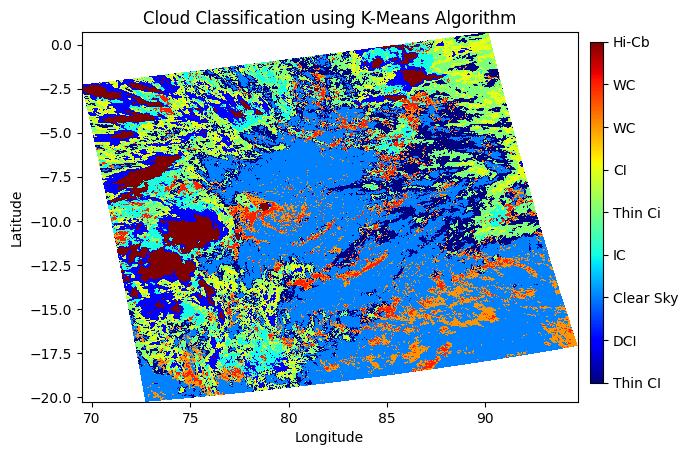

In [229]:
clustered_array=labelsk.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Thin CI","DCI","Clear Sky","IC","Thin Ci","CI","WC","WC","Hi-Cb"]

cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using K-Means Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [230]:
sk

[421661, 173047, 1104211, 146299, 302100, 177545, 213113, 122890, 87754]

In [231]:
size

87754

In [232]:
cldk=["Thin CI","DCI","Clear Sky","IC","Thin Ci","CI","WC","WC","Hi-Cb"]

In [304]:
sk[0]=sk[0]+sk[4]
sk[6]=sk[6]+sk[8]
sk = np.delete(sk, (4,8))
cldk = np.delete(cldk, (4,8))

IndexError: index 8 is out of bounds for axis 0 with size 7

Text(0.5, 1.0, 'No. of Pixel of different clound using Kmeans')

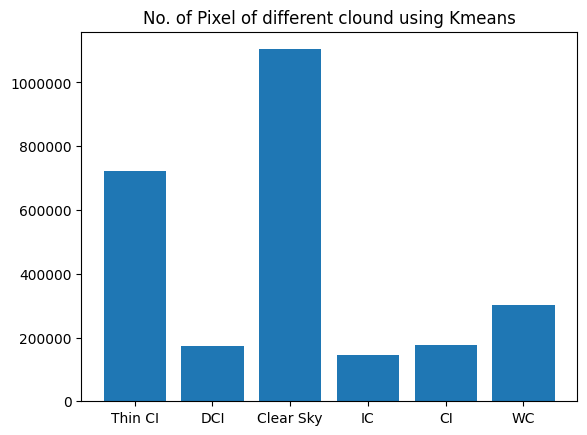

In [234]:
plt.bar(cldk,sk)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("No. of Pixel of different clound using Kmeans")

In [303]:
np.array(sk)/2748620*100

array([15.34082558,  6.29577752, 40.17328696,  5.32263463, 10.99097001,
        6.45942327,  7.75345446,  4.47097089,  3.19265668])

## GMM

In [239]:
from sklearn.mixture import GaussianMixture
import numpy as np



gmm = GaussianMixture(n_components=9)


gmm.fit(X)

labelsg = gmm.predict(X)

centers = gmm.means_



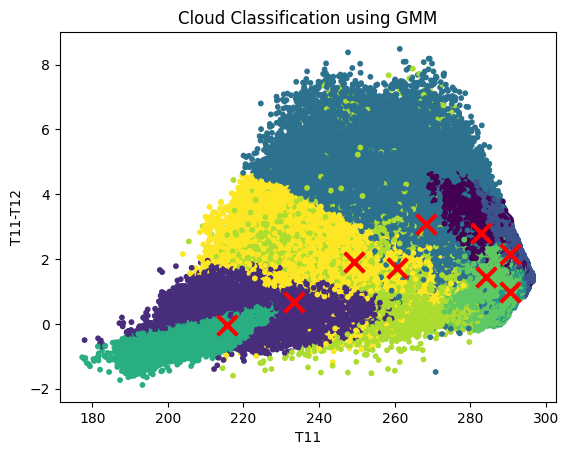

In [240]:
plt.scatter(X[:, 0], X[:, 1], c=labelsg, s=10)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r');
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using GMM")
plt.xlabel("T11")
plt.ylabel("T11-T12")
plt.show()



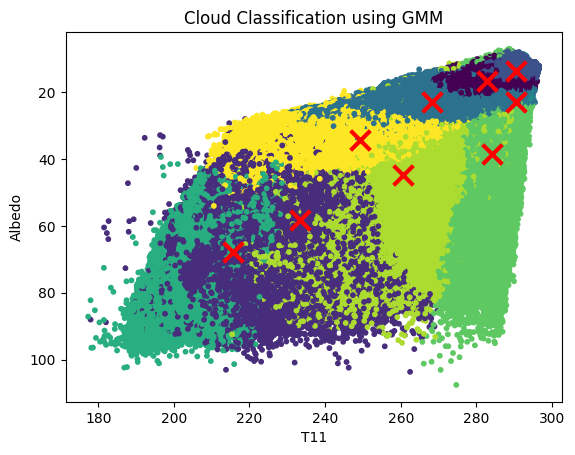

In [241]:
plt.scatter(X[:, 0], X[:, 2], c=labelsg, s=10)
plt.scatter(centers[:, 0], centers[:, 2], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()
plt.title("Cloud Classification using GMM")
plt.xlabel("T11")
plt.ylabel("Albedo")
plt.show()



In [252]:
sizes = np.bincount(labelsg)
s=0
sg=[]
for i, (center, size) in enumerate(zip(centers, sizes)):
    s=s+size
    sg.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

Cluster 1: center=[282.79843925   2.81312091  16.50615913], size=438307
Cluster 2: center=[233.282722     0.66310351  58.29469881], size=214741
Cluster 3: center=[290.59821975   2.16047269  13.57592271], size=761718
Cluster 4: center=[268.37319171   3.07463822  22.83372175], size=391451
Cluster 5: center=[290.33735908   0.98073298  22.97776054], size=170235
Cluster 6: center=[ 2.15526168e+02 -4.95755567e-02  6.77471453e+01], size=111614
Cluster 7: center=[283.99995815   1.44568378  38.49874665], size=194665
Cluster 8: center=[260.70523775   1.7143323   44.6542589 ], size=243085
Cluster 9: center=[249.13698367   1.91345709  34.21427907], size=222804


2748620

C:\Users\Arushi.SUSHANT\AppData\Local\Temp\ipykernel_13052\3465116482.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")


Text(0, 0.5, 'Latitude')

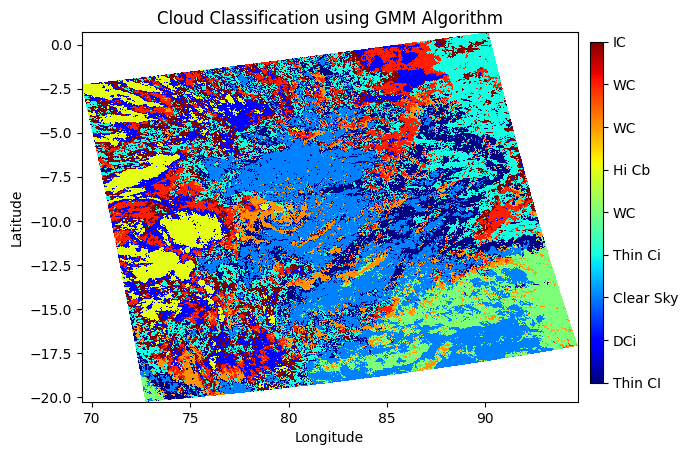

In [253]:
clustered_array=labelsg.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Thin CI","DCi","Clear Sky","Thin Ci","WC","Hi Cb","WC","WC","IC"]
cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using GMM Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [254]:
cldg=["Thin CI","DCi","Clear Sky","Thin Ci","WC","Hi Cb","WC","WC","IC"]

In [256]:
sg[0]=sg[0]+sg[3]
sg[4]=sg[4]+sg[6]+sg[7]
sg = np.delete(sg, (3,6,7))
cldg = np.delete(cldg, (3,6,7))

Text(0.5, 1.0, 'No. of Pixel of different clound using GMM')

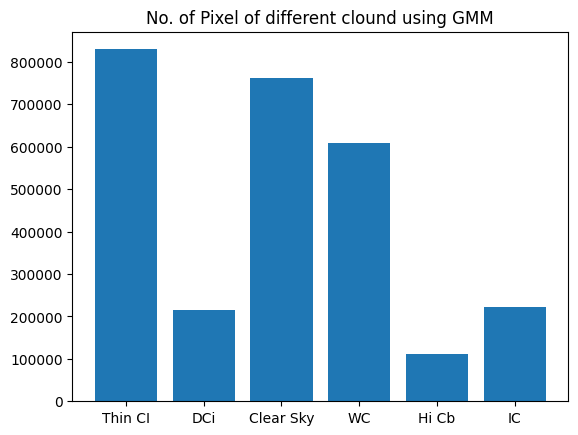

In [258]:
plt.bar(cldg,sg)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("No. of Pixel of different clound using GMM")

In [307]:
np.array(sg)/2748620*100

array([30.18816715,  7.81268418, 27.71274312, 22.11964549,  4.06072866,
        8.10603139])

## Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=9)


agg.fit(X)

# Get the predicted labels
labels = agg.labels_
centroids = np.zeros((9, X.shape[1]))
for i in range(9):
    centroids[i, :] = np.mean(X[labels == i, :], axis=0)
plt.scatter(X[:, 1], X[:, 0], c=labels,)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()

plt.show()


In [77]:
sizes = np.bincount(labels)
s=0
s10=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    s10.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

Cluster 1: center=[237.06750141   1.71935407  40.67558342], size=186434
Cluster 2: center=[282.60101838   1.21139248  41.53813336], size=412258
Cluster 3: center=[226.51410074   0.61703187  58.39711729], size=827950
Cluster 4: center=[257.169993     1.21202041  53.85736054], size=173688
Cluster 5: center=[291.03404149   2.00263448  14.204032  ], size=101095
Cluster 6: center=[283.56524004   2.62098518  17.55953881], size=382132
Cluster 7: center=[ 2.11978316e+02 -3.60891962e-02  7.60668583e+01], size=237559
Cluster 8: center=[255.98187938   2.78393102  29.3292946 ], size=177410
Cluster 9: center=[271.52756299   2.92792782  22.33120554], size=250094


2748620

## Fuzzy Clustering

In [259]:
import skfuzzy as fuzz

n_clusters = 9
m = 2
error = 0.005
max_iter = 100

# Perform fuzzy c-means clustering
centroids, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, n_clusters, m, error, max_iter, init=None)




In [279]:


labelsf = np.argmax(u, axis=0)
labelsf

array([3, 3, 3, ..., 8, 8, 5], dtype=int64)

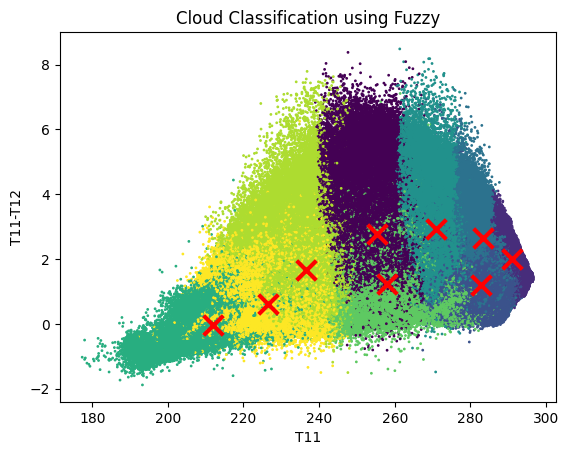

In [280]:
plt.scatter(X[:, 0], X[:, 1], c=labelsf, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r');
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using Fuzzy")
plt.xlabel("T11")
plt.ylabel("T11-T12")

plt.show()

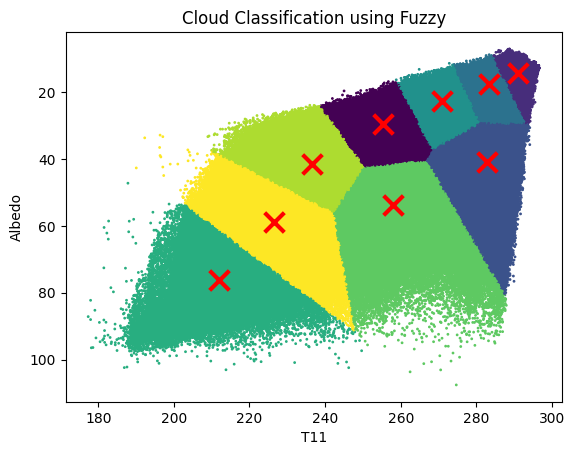

In [283]:
plt.scatter(X[:, 0], X[:, 2], c=labelsf, s=1)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()
plt.title("Cloud Classification using Fuzzy")
plt.xlabel("T11")
plt.ylabel("Albedo")

plt.show()

In [284]:
sizes = np.bincount(labelsf)
s=0
sf=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    sf.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

Cluster 1: center=[255.22089436   2.77457993  29.59963215], size=232679
Cluster 2: center=[290.99840837   2.00686808  14.21763932], size=861745
Cluster 3: center=[282.83555034   1.21045205  40.8641567 ], size=205631
Cluster 4: center=[283.32959272   2.64077574  17.58626724], size=531800
Cluster 5: center=[271.00627594   2.92931484  22.53871686], size=317844
Cluster 6: center=[ 2.11885228e+02 -4.05094633e-02  7.61407081e+01], size=85165
Cluster 7: center=[257.8894336    1.21638953  53.71748398], size=170163
Cluster 8: center=[236.62053223   1.6603036   41.29933964], size=167063
Cluster 9: center=[226.56280972   0.61098922  58.72532465], size=176530


2748620

C:\Users\Arushi.SUSHANT\AppData\Local\Temp\ipykernel_13052\127984717.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")


Text(0, 0.5, 'Latitude')

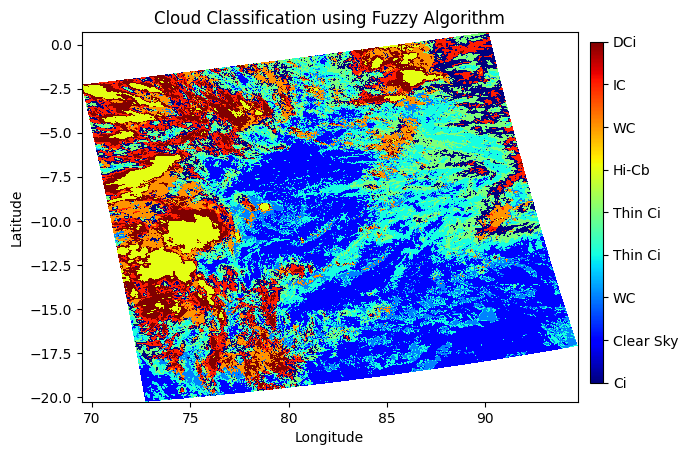

In [291]:
clustered_array=labelsf.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Ci","Clear Sky","WC","Thin Ci","Thin Ci","Hi-Cb","WC","IC","DCi"]
cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using Fuzzy Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [287]:
cldf=["Ci","Clear Sky","WC","Thin Ci","Thin Ci","Hi-Cb","WC","IC","DCi"]

In [289]:
sf[2]=sf[2]+sf[7]
sf[3]=sf[3]+sf[4]
sf = np.delete(sf, (4,7))
cldf = np.delete(cldf, (4,7))

Text(0.5, 1.0, 'No. of Pixel of different clound using Fuzzy')

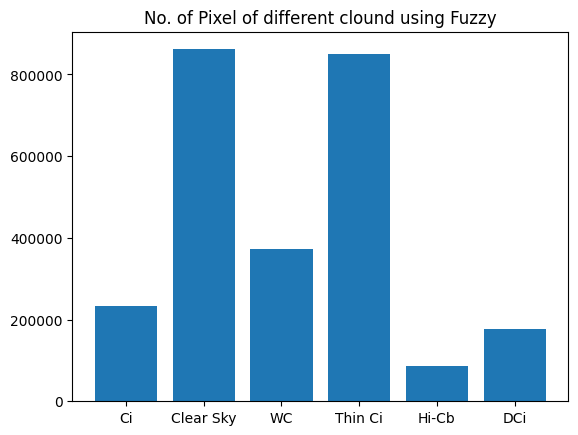

In [292]:
plt.bar(cldf,sf)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("No. of Pixel of different clound using Fuzzy")

In [309]:
sf/2748620*100

array([ 8.46530259, 31.35191478, 13.5593134 , 30.91165749,  3.09846396,
        6.19085214,  6.42249565])

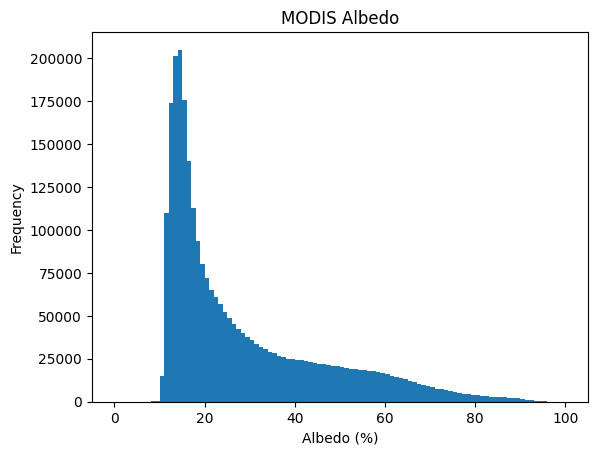

In [151]:
plt.hist(alpha, bins=100, range=(0, 100))
plt.title('MODIS Albedo')
plt.xlabel('Albedo (%)')
plt.ylabel('Frequency')




plt.show()

In [294]:
num_pixels = np.count_nonzero(alpha <= 12)


print(f'Number of pixels with albedo < 12%: {num_pixels}')

Number of pixels with albedo < 12%: 125688


In [296]:
125688/2748620*100

4.572767425107872